In [460]:
#finds all pathnames matching a pattern, like regex
import glob
#word encoding
import codecs
#natural language toolkit
import nltk
#regular expressions
import re
#stemming
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import time
#parse dataset
import pandas as pd
porter=PorterStemmer()
import numpy as np
import math
from wordcloud import WordCloud
import collections
import matplotlib.pyplot as plt
import os
import math
import string

In [461]:
##stopwords like the at a an, unnecesasry
##tokenization into sentences, punkt 
##http://www.nltk.org/

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Olek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [462]:
nasa_filenames = []
nasa_filenamess = sorted(glob.glob("C:\\Users\\Olek\\Documents\\Genéve\\Recherche d'information\\nasa\\*.txt"))
count =0
N = 15 #We can take more, but i chose just 15 documents
for child in nasa_filenamess:
    if count < N:
        print(child)
    else:
        break
    count = count+1
    nasa_filenames.append(child)

C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt01995.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt02495.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt02695.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04395.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04495.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04595.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04795.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04895.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04995.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt05095.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt05995.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt07295.txt
C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt07895.txt
C:\Users\Olek\Documents\Genéve\Recherche d'informat

In [463]:
#initialize raw unicode , i'll add all text to this file in memory
corpus_raw = u""
corpus_raww = []
#for each book, read it, open it in utf 8 format, 
#add it to the raw corpus
for nasa_filename in nasa_filenames:
    print("Reading '{0}'...".format(nasa_filename))
    with codecs.open(nasa_filename, "r", 'unicode_escape') as book_file:
        corpus_raw += book_file.read()
    corpus_raww.append(corpus_raw)   
    print ("Corpus is now {0} characters long".format(len(corpus_raw)))
    print ()

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt01995.txt'...
Corpus is now 4346 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt02495.txt'...
Corpus is now 7633 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt02695.txt'...
Corpus is now 10480 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04395.txt'...
Corpus is now 14185 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04495.txt'...
Corpus is now 16835 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04595.txt'...
Corpus is now 21372 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04795.txt'...
Corpus is now 24039 characters long

Reading 'C:\Users\Olek\Documents\Genéve\Recherche d'information\nasa\emt04895.txt'...
Corpus is now 27405 characters long

Reading 'C:\Users\

In [464]:
#tokenizastion
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [465]:
#tokenize into sentences
raw_sentences = tokenizer.tokenize(corpus_raw)

In [466]:
from nltk.tokenize import sent_tokenize, word_tokenize
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)
print(x)

electron integr of design and analysi process wa achiev and refin at nasa langley research center dure the develop of an optic bench for a laser-bas aerospac experi . 


In [467]:
#sentence where each word is stemmed
sentences_stemmed = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences_stemmed.append(stemSentence(raw_sentence))

In [468]:
#convert into a list of words
#remove unnnecessary, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [469]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in sentences_stemmed:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [470]:
#remove stop words
stop = set(stopwords.words('english'))
wordcount = collections.defaultdict(int)

#texts = [[word.lower() for word in line.split()] for line in sentences]
# \W is regex for characters that are not alphanumerics.
# all non-alphanumerics are replaced with a blank space using re.sub
pattern = r"\W"
for word in str(sentences).lower().split():
    word = re.sub(pattern, '', word)
    if word not in stop:
        wordcount[word] += 1

In [471]:

sorted_words = {k: v for k, v in sorted(wordcount.items(), key=lambda item: item[1],reverse=True)}


In [472]:
sorted_words

{'technolog': 103,
 'nasa': 85,
 'thi': 84,
 'commerci': 83,
 'develop': 74,
 'model': 71,
 'analysi': 67,
 'comput': 58,
 'use': 57,
 'design': 55,
 'program': 48,
 'structur': 45,
 'process': 36,
 'langley': 36,
 'code': 36,
 'method': 36,
 'ha': 34,
 'transfer': 34,
 'requir': 31,
 'simul': 30,
 'stress': 29,
 'vehicl': 25,
 'load': 24,
 'detail': 24,
 'applic': 24,
 'flow': 24,
 'thermal': 23,
 'partner': 23,
 'equat': 23,
 'object': 22,
 'crack': 21,
 'benefit': 20,
 'problem': 20,
 'system': 19,
 'interest': 19,
 'materi': 19,
 'composit': 19,
 'part': 18,
 'form': 18,
 'softwar': 18,
 'interfac': 18,
 'element': 18,
 'perform': 17,
 'option': 17,
 'work': 17,
 'provid': 17,
 'potenti': 16,
 'research': 16,
 'time': 16,
 'partnership': 16,
 'aircraft': 16,
 'techniqu': 16,
 'opportun': 16,
 'gener': 16,
 'predict': 15,
 'industri': 15,
 'calcul': 15,
 'see': 15,
 'fill': 15,
 'commercialization': 15,
 'user': 15,
 'finit': 15,
 'complex': 14,
 'engin': 14,
 'dynam': 14,
 'appli':

In [473]:
dict(list(sorted_words.items())[0: 10])  

{'technolog': 103,
 'nasa': 85,
 'thi': 84,
 'commerci': 83,
 'develop': 74,
 'model': 71,
 'analysi': 67,
 'comput': 58,
 'use': 57,
 'design': 55}

In [474]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return dict(islice(iterable, n))

n_items = take(50, sorted_words.items())

<IPython.core.display.Javascript object>


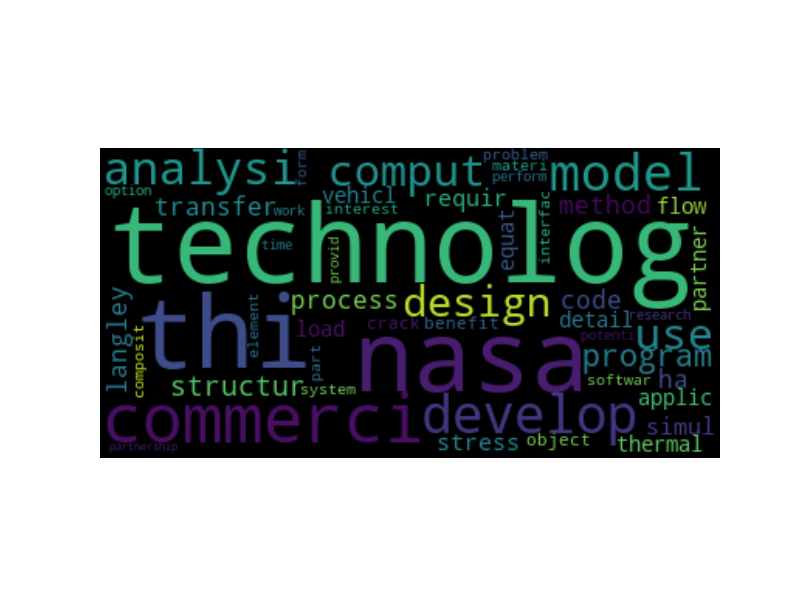

In [475]:
%matplotlib notebook
wc = WordCloud().generate_from_frequencies(n_items)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [476]:
# Example
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Electronic
integration of design and analysis processes was achieved and refined at
NASA Langley Research Center during the development of an optical bench for
a laser-based aerospace experiment.
['Electronic', 'integration', 'of', 'design', 'and', 'analysis', 'processes', 'was', 'achieved', 'and', 'refined', 'at', 'NASA', 'Langley', 'Research', 'Center', 'during', 'the', 'development', 'of', 'an', 'optical', 'bench', 'for', 'a', 'laser', 'based', 'aerospace', 'experiment']


In [477]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens.".format(token_count))

The book corpus contains 7,039 tokens.


In [478]:
####### - Calculating TF - IDF ###########

In [479]:

def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

In [480]:
# Cosine Similarity
def cosine_similarity(x, y):
    x_sqrt = np.sqrt(np.dot(x, x))
    y_sqrt = np.sqrt(np.dot(y, y))
    if y_sqrt != 0:     
        return (np.dot(x,y.T) / (x_sqrt * y_sqrt))
    elif y_sqrt == 0:
        return 0

In [481]:
# check cosine_similarity
print (cosine_similarity(np.array([1,2,3]), np.array([1,2,3])))
print (cosine_similarity(np.array([3,4,5]), np.array([3,4,8])))

1.0
0.9743911956946198


In [482]:
import string

def clean_str(texts):
    # input : string that needs to clean all number and signs

    texts = re.sub('cnn',' cnn ', texts)
    texts = re.sub('\'', ' ', texts)
    texts = ''.join(c for c in texts if c not in string.punctuation)
    texts = ''.join([c for c in texts if not c.isdigit()])
    
    return texts

In [483]:
### doc2vocab ###
# Doc 0 : (vocab 1 : num 1), (vocab 2 : num 2), (vocab 3 : num 3)
# Doc 1 : ... 

### vocab2doc ###
# word : [text_num1, text_num2 ... ]

doc2vocab  = dict()
vocab2doc  = dict()

for i in range(0,15):
    doc2vocab[i] = dict()

    with open('C:/Users/Olek/Documents/Genéve/Recherche d\'information/nasa1/%d.txt' % i, 'r', encoding="utf-8") as doc:
        read_string = doc.read()                       # get sentence as read function
        read_string = read_string.lower()              # sentence lower
        read_string = clean_str(read_string)           # clean all punctuation and number
        
        tokens = nltk.word_tokenize(read_string)       # get tokens of sentence
        stop = set(stopwords.words('english'))
        tokens = [j for j in tokens if j not in stop] # get rid of stopwords at token
        
        ### get shape of {doc : {word1 : word1_num, word2 : word2_num, .... }}
        for words in tokens:
            # make document and vocab pair dictionary
            if words in doc2vocab[i]:
                doc2vocab[i][words] += 1
                
            else:
                doc2vocab[i][words] = 1
            
            # make inverted index, {word : [doc1, doc3, ... ]}
            text_str = str(i) + '.txt'
            if words in vocab2doc:
                if text_str not in vocab2doc[words]:
                    vocab2doc[words].append(text_str)
                    
            else:
                vocab2doc[words] = list()
                vocab2doc[words].append(text_str)

In [484]:
term_pd = pd.DataFrame.from_dict(doc2vocab,columns=['the', 'of','nasa'], orient='index')
term_pd = term_pd.fillna(0)#fill null space with 0
term_pd.head()

,the,of,nasa
0,0,0,7
1,0,0,5
2,0,0,8
3,0,0,4
4,0,0,4


In [485]:
term_pd = pd.DataFrame.from_dict(doc2vocab, orient='index')
term_pd = term_pd.fillna(0)#fill null space with 0
term_pd.head()

,data,visualization,tools,techniques,animation,lab,nasa,langley,developed,two,...,clone,processor,meg,comes,demonstration,illustrate,opportunities,exist,meet,technologies
0,5.0,11.0,2.0,2.0,1.0,1.0,7,4,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,4,2,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,4,1,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1.0,0.0,0.0,0.0,0.0,0.0,14,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,5,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [486]:
# get query from the query.txt
query = list()

f = open('./Documents/Genéve/Recherche d\'information/nasa1/1_query.txt', 'r')
query = f.readlines()
query

['integrated analysis']

In [487]:
def doc_tf_idf(dataframe, query):
    
    # query tf-idf
    _, width = dataframe.shape
    final = list()
    
    # document tf-idf 
    new_tf = dataframe
    doc_term_value = dataframe[dataframe > 0].count().values # get array of number that document has that term
    doc_frequency = np.log(17 / (doc_term_value + 1))
    
    start = time.time()
    for i in range(len(dataframe)):
        results = np.zeros(width)
        one_row = dataframe.loc[i]
        row_value = one_row.values
        row_index = one_row.index
        
        for j,term in enumerate(row_index):
            if row_value[j] > 0:
                #term_frequency = 1 + np.log(row_value[j])
                term_frequency = np.log(row_value[j] + 1)
                new_tf.iloc[i,j] = term_frequency * doc_frequency[j]
                    
            elif row_value[j] == 0:
                term_frequency = 0
                new_tf.iloc[i,j] = 0
                
            if term in query:
                new_column = dataframe[[term]]
                new_col_value = new_column[new_column > 0].count().values
                results[j] = term_frequency * (np.log(17 / (new_col_value[0]+1)))
        
        final.append((i, cosine_similarity(new_tf.loc[i].values, results)))
    
        if i % 10 == 0:
            print ('step : %d, time : %f' % (i, time.time()-start))
            
    return new_tf, final

query_token = nltk.word_tokenize(query[0])
term_doc_matrix, query_tf_idf = doc_tf_idf(term_pd, query_token)

step : 0, time : 0.382700
step : 10, time : 3.686877


In [488]:
query[0]

'integrated analysis'

In [489]:
print (term_doc_matrix[['visualization']])
print (term_doc_matrix[['nasa']])

    visualization
0        5.317865
3        0.000000
4        0.000000
11       0.000000
6        0.000000
5        0.000000
14       0.000000
1        0.000000
2        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
12       0.000000
13       0.000000
        nasa
0   0.126065
3   0.108625
4   0.133206
11  0.006252
6   0.007581
5   0.108625
14  0.000458
1   0.126065
2   0.108625
7   0.108625
8   0.108625
9   0.000378
10  0.126065
12  0.066603
13  0.000028


In [490]:
# (Document number, Cosine-Similarity between query and document)
score = sorted(query_tf_idf, key = lambda x : x[1], reverse=True)
score

[(7, 0.3162277660168379),
 (8, 0.3088792003745611),
 (1, 0.2578742884948646),
 (9, 0.1938006332446037),
 (2, 0.17200522903844537),
 (3, 0.16501873233232023),
 (11, 0.13678292657118538),
 (12, 0.0848528137423857),
 (4, 0.036386265537839094),
 (0, 0.027181704943236927),
 (6, 0.009053437531505679),
 (14, 0.002640484167711252),
 (5, 0),
 (10, 0),
 (13, 0)]

In [491]:
tokens

['dsmc',
 'conventional',
 'cfd',
 'enough',
 'direct',
 'simulation',
 'monte',
 'carlo',
 'dsmc',
 'method',
 'technique',
 'computer',
 'modeling',
 'real',
 'gas',
 'thousands',
 'millions',
 'simulated',
 'molecules',
 'method',
 'used',
 'primarily',
 'modeling',
 'low',
 'density',
 'rarefied',
 'gases',
 'navierstokes',
 'equations',
 'computational',
 'fluid',
 'dynamics',
 'cfd',
 'provide',
 'valid',
 'model',
 'computer',
 'conducts',
 'direct',
 'physical',
 'simulation',
 'fluid',
 'problem',
 'rather',
 'solving',
 'system',
 'mathematical',
 'equations',
 'model',
 'process',
 'dsmc',
 'used',
 'langley',
 'research',
 'center',
 'study',
 'everything',
 'shuttle',
 'reentry',
 'upper',
 'atmosphere',
 'details',
 'interaction',
 'two',
 'shocks',
 'scale',
 'thousandths',
 'inch',
 'potential',
 'commercial',
 'uses',
 'low',
 'pressure',
 'chemical',
 'vapor',
 'deposition',
 'micromechanical',
 'devices',
 'microchannel',
 'flow',
 'chemical',
 'vapor',
 'infiltratio

In [492]:
# Inverted Index Posting Lists Result
print ('visualization : ', vocab2doc['visualization'])
print ('nasa : ', vocab2doc['nasa'])
print ('fluid : ', vocab2doc['fluid'])

visualization :  ['0.txt']
nasa :  ['0.txt', '1.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt', '10.txt', '11.txt', '12.txt', '13.txt', '14.txt']
fluid :  ['0.txt', '5.txt', '6.txt', '14.txt']
